Downloaded From 
https://github.com/AleksandarMitrevski/se-requirements-classification/tree/master/1-exploratory-analysis/data

In [81]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [82]:
raw_data_path = r'../data/PROMISE_exp.csv'

In [83]:
df = pd.read_csv(raw_data_path)
df = df.drop('_class_', axis=1)
df['RequirementID'] = df.groupby('ProjectID').cumcount() + 1
df = df[['ProjectID', 'RequirementID', 'RequirementText']]
df.head()

,ProjectID,RequirementID,RequirementText
0,1,1,The system shall refresh the display every 60 seconds.
1,1,2,The application shall match the color of the schema set forth by Department of Homeland Security
2,1,3,If projected the data must be readable. On a 10x10 projection screen 90% of viewers must be able to read Event / Activity data from a viewing distance of 30
3,1,4,The product shall be available during normal business hours. As long as the user has access to the client PC the system will be available 99% of the time during the first six months of operation.
4,1,5,If projected the data must be understandable. On a 10x10 projection screen 90% of viewers must be able to determine that Events or Activities are occuring in current time from a viewing distance of 100


In [84]:
#show the number of requirements for each project
requirement_distribution = df.groupby('ProjectID', as_index=False)['RequirementID'].count().sort_values('RequirementID', ascending=False)
requirement_distribution.head()

,ProjectID,RequirementID
7,8,92
2,3,79
43,46,77
5,6,74
4,5,73
3,4,55
9,10,53
1,2,40
42,45,39
0,1,28


In [85]:
#filter out some of the projects to reduce the scope of the analysis
#only consider projects that have between 5 and 15 requirements
# applicable_projects = requirement_distribution.loc[(requirement_distribution['RequirementID'] >= 5) & 
#                                                    (requirement_distribution['RequirementID'] <= 15)]['ProjectID'].tolist()
applicable_projects = requirement_distribution.loc[(requirement_distribution['RequirementID'] >= 3) & 
                                                    (requirement_distribution['RequirementID'] <= 8)]['ProjectID'].tolist()
print(f"DF size before filtering {df.shape}")
df = df.loc[df['ProjectID'].isin(applicable_projects)]
print(f"DF size after filtering {df.shape}")

DF size before filtering (969, 3)
DF size after filtering (90, 3)


In [86]:
df.head(20)

,ProjectID,RequirementID,RequirementText
634,17,1,The system shall provide an option to withdraw money.
635,17,2,The system shall query the user for the amount of money.
636,17,3,The system shall query the user for the account type.
637,17,4,The system shall validate the amount is available in the user's account before releasing funds to the user.
638,17,5,The system shall validate the amount is a multiple of $20.
639,17,6,The system shall debit the user's account upon withdrawal of funds.
640,17,7,The system shall be able to issue a specific amount of money to the user.
652,19,1,The system must be easy to use by both managers and chefs such that they do not need to read an extensive amount of manuals.
653,19,2,The system must be quickly accessible by both managers and chefs.
654,19,3,The system must be intuitive and simple in the way it displays all relevant data and relationships.


In [87]:
print(f"Number of projects: {len(applicable_projects)}")
print(applicable_projects)

Number of projects: 16
[20, 35, 34, 19, 36, 31, 17, 40, 24, 29, 25, 37, 49, 43, 47, 21]


In [88]:
df.to_csv('requirements.csv', index=False)

In [90]:
#assume that the list of requirments is not ordered. 
#combine the list of requirements into a single string for each project
df_grouped = df.groupby('ProjectID')['RequirementText'].apply(lambda x: ' '.join(x)).reset_index()
df_grouped.to_csv('requirements_grouped.csv', index=False)
df_grouped.head(1)

,ProjectID,RequirementText
0,17,The system shall provide an option to withdraw money. The system shall query the user for the amount of money. The system shall query the user for the account type. The system shall validate the amount is available in the user's account before releasing funds to the user. The system shall validate the amount is a multiple of $20. The system shall debit the user's account upon withdrawal of funds. The system shall be able to issue a specific amount of money to the user.


# Labelling the Dataset

In [65]:
from graphviz import Digraph
from IPython.display import display

def render_graph(nodes):
    dot = Digraph(comment='Cafeteria Ordering System Process Flow')
    dot.attr(rankdir='LR')  # Set the direction from Left to Right

    # Add nodes and edges to the graph
    for node_pair in nodes:
        node_pair[0] = node_pair[0].replace(":", "_")
        node_pair[1] = node_pair[1].replace(":", "_")
        dot.node(node_pair[0], node_pair[0])
        dot.node(node_pair[1], node_pair[1])
        dot.edge(node_pair[0], node_pair[1])

    display(dot)

In [66]:
#~ 
qwe = pd.read_csv('Answers.csv')
qwe = qwe.groupby('ProjectID')['Answer'].apply(lambda x: ' '.join(x)).reset_index()
qwe.head(1)

,ProjectID,Answer
0,11,"['Start', 'User Access'] ['User Access', 'User Role Verification'] ['User Role Verification', 'Exclusive Gateway: Caller or Supervisor?'] ['Exclusive Gateway: Caller or Supervisor?', 'Caller Task Completion'] ['Exclusive Gateway: Caller or Supervisor?', 'Supervisor Task Completion'] ['Caller Task Completion', 'Task Time Verification'] ['Task Time Verification', 'Task Completion Time <= 2 minutes?'] ['Task Completion Time <= 2 minutes?', 'End'] ['Supervisor Task Completion', 'Task Time Verification'] ['Task Time Verification', 'Task Completion Time <= 2 minutes?'] ['Task Completion Time <= 2 minutes?', 'End'] ['User Access', 'User Learning'] ['User Learning', 'User Learning Time Verification'] ['User Learning Time Verification', 'Learning Time <= 10 minutes?'] ['Learning Time <= 10 minutes?', 'End'] ['User Access', 'System Responsiveness'] ['System Responsiveness', 'DePaul TeleServices Center?'] ['DePaul TeleServices Center?', 'Supervisor View Caller Schedule'] ['Supervisor View Caller Schedule', 'System Response Time Verification'] ['System Response Time Verification', '90% <= 2 seconds, 10% <= 5 seconds?'] ['System Response Time Verification', '56k Connection?'] ['56k Connection?', 'System Response Time Verification'] ['System Response Time Verification', '90% <= 6 seconds?'] ['System Response Time Verification', '112k Connection or Faster?'] ['112k Connection or Faster?', 'System Response Time Verification'] ['System Response Time Verification', '90% <= 3 seconds?'] ['System Responsiveness', 'End'] ['User Access', 'System Availability'] ['System Availability', '12:00AM - 6:00PM Availability'] ['12:00AM - 6:00PM Availability', 'End'] ['System Availability', '7:00AM - 11:59PM Availability'] ['7:00AM - 11:59PM Availability', 'End'] ['User Access', 'Browser Independence'] ['Browser Independence', 'Internet Explorer or Netscape Navigator?'] ['Internet Explorer or Netscape Navigator?', 'End'] ['User Access', 'Supervisor Permissions'] ['Supervisor Permissions', 'Advertise Empty Time Slots'] ['Advertise Empty Time Slots', 'End'] ['Supervisor Permissions', 'Enter Caller Schedule'] ['Enter Caller Schedule', 'End'] ['Supervisor Permissions', 'View All Caller Schedules'] ['View All Caller Schedules', 'End'] ['User Access', 'Interface Survey'] ['Interface Survey', 'Interface Simplicity'] ['Interface Simplicity', '90% Beta Testers Report Adequate Simplicity?'] ['90% Beta Testers Report Adequate Simplicity?', 'End'] ['Interface Survey', 'Interface Appeal'] ['Interface Appeal', '80% Beta Testers Report Appeal?'] ['80% Beta Testers Report Appeal?', 'End']"


In [67]:
id_ = applicable_projects[0]
sample = df_grouped.loc[df_grouped['ProjectID'] == id_]
sample

,ProjectID,RequirementText
2,20,All Web pages generated by the system shall be fully downloadable in no more than 10 seconds over a 40KBps modem connection. Responses to queries shall take no longer than 7 seconds to load onto the screen after the user submits the query. The system shall display confirmation messages to users within 4 seconds after the user submits information to the system. All network transactions that involve financial information or personally identifiable information shall be encrypted. Users shall be required to log in to the Cafeteria Ordering System for all operations except viewing a menu. Patrons shall log in according to the restricted computer system access policy. The system shall permit only cafeteria staff members who are on the list of authorized Menu Managers to create or edit menus. Only users who have been authorized for home access to the corporate Intranet may use the COS from non-company locations.


In [68]:
#~
qwe.loc[qwe['ProjectID'] == id_, 'Answer'].reset_index(drop=True)[0]

"['Start', 'Access System'] ['Access System', 'View Menu'] ['View Menu', 'Exclusive Gateway: Need to log in?'] ['Exclusive Gateway: Need to log in?', 'User Login'] ['Exclusive Gateway: Need to log in?', 'End'] ['User Login', 'Verify Credentials'] ['Verify Credentials', 'Exclusive Gateway: Company network?'] ['Exclusive Gateway: Company network?', 'Successful Login and Redirection'] ['Exclusive Gateway: Company network?', 'Home Access Authorization'] ['Home Access Authorization', 'Exclusive Gateway: Authorized?'] ['Exclusive Gateway: Authorized?', 'Successful Login and Redirection'] ['Exclusive Gateway: Authorized?', 'End: Access Denied'] ['Successful Login and Redirection', 'Exclusive Gateway: User role?'] ['Exclusive Gateway: User role?', 'Menu Management'] ['Exclusive Gateway: User role?', 'Order Placement'] ['Menu Management', 'Save Changes'] ['Save Changes', 'Display Confirmation'] ['Display Confirmation', 'End'] ['Order Placement', 'Submit Order'] ['Submit Order', 'Encrypt Transac

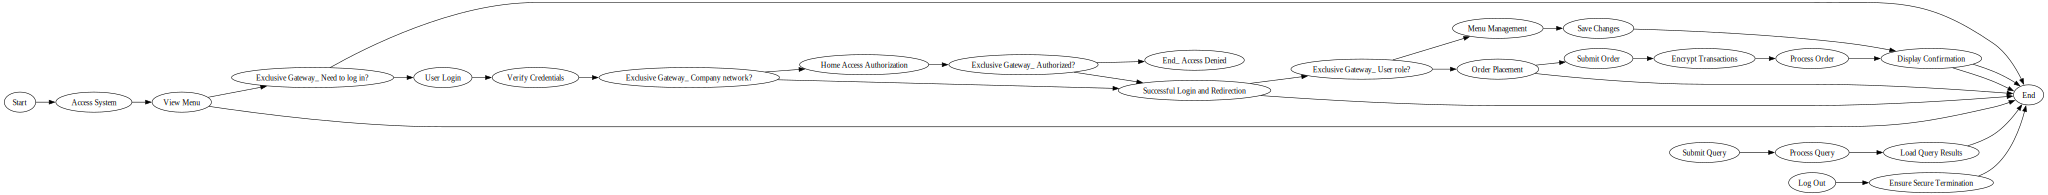

In [69]:
annotation = [['Start', 'Access System'], 
              ['Access System', 'View Menu'], 
              ['View Menu', 'Exclusive Gateway: Need to log in?'], 
              ['Exclusive Gateway: Need to log in?', 'User Login'],
              ['Exclusive Gateway: Need to log in?', 'End'], 
              ['User Login', 'Verify Credentials'], 
              ['Verify Credentials', 'Exclusive Gateway: Company network?'], 
              ['Exclusive Gateway: Company network?', 'Successful Login and Redirection'],
              ['Exclusive Gateway: Company network?', 'Home Access Authorization'], 
              ['Home Access Authorization', 'Exclusive Gateway: Authorized?'],
              ['Exclusive Gateway: Authorized?', 'Successful Login and Redirection'],
              ['Exclusive Gateway: Authorized?', 'End: Access Denied'],
              ['Successful Login and Redirection', 'Exclusive Gateway: User role?'],
              ['Exclusive Gateway: User role?', 'Menu Management'],
              ['Exclusive Gateway: User role?', 'Order Placement'],
              ['Menu Management', 'Save Changes'],
              ['Save Changes', 'Display Confirmation'],
              ['Display Confirmation', 'End'],
              ['Order Placement', 'Submit Order'],
              ['Submit Order', 'Encrypt Transactions'],
              ['Encrypt Transactions', 'Process Order'], 
              ['Process Order', 'Display Confirmation'],
              ['Display Confirmation', 'End'],
              ['Successful Login and Redirection', 'End'],
              ['Order Placement', 'End'],
              ['View Menu', 'End'],
              ['Submit Query', 'Process Query'],
              ['Process Query', 'Load Query Results'],
              ['Load Query Results', 'End'],
              ['Log Out', 'Ensure Secure Termination'],
              ['Ensure Secure Termination', 'End']]

annotation_df = pd.DataFrame(annotation, columns=['from_node', 'to_node'])
annotation_df['ProjectID'] = id_

render_graph(annotation)

In [70]:
id_ = applicable_projects[1]
sample = df_grouped.loc[df_grouped['ProjectID'] == id_]
sample

,ProjectID,RequirementText
9,35,"The logo and the current basic design of registration system should be displayed. The system should be attractive according to the clients. The design and the color should make users feel comfortable when using the system instead of flashing useless colors on the screen. The design should also reflect the seriousness of the environment. The system should be able to manage all the information incoming from the database and the catalogue. The product is Web based therefore it will be used in any environment that allows Web access. For the system to successfully operate the registration system should be integrated with other IT services and the portal. The system should need to be entirely self-supporting since the users would be using it only to register courses. The Web interface should be compatible with standards in order to be usable via all major Web browsers in a wide variety of environments. Everyone (stakeholders and guests) can have access to the system and the catalogue. Every client must have secure and private access to his/her data. The and the service man can have access to every part of the system. All these accesses (except the ""guest tour"" access) require identification through ID and password. The system will develop a security system that will reduce to the minimum the possibility of corruption from systems and/or humans."


In [71]:
#change this so that it is a nested list of lists
annotation = [['Start', 'Display Logo and Basic Design'], 
              ['Display Logo and Basic Design', 'Attractive Design According to Clients'], 
              ['Attractive Design According to Clients', 'Comfortable User Experience'], 
              ['Comfortable User Experience', 'Reflect Seriousness of Environment'], 
              ['Reflect Seriousness of Environment', 'Manage Information from Database and Catalogue'], 
              ['Manage Information from Database and Catalogue', 'Web Based Product'], 
              ['Web Based Product', 'Integration with IT Services and Portal'], 
              ['Integration with IT Services and Portal', 'Self-Supporting Registration System'], 
              ['Self-Supporting Registration System', 'Compatible Web Interface'], 
              ['Compatible Web Interface', 'Accessible to Stakeholders and Guests'], 
              ['Accessible to Stakeholders and Guests', 'Secure and Private Client Access'], 
              ['Secure and Private Client Access', 'Service Man Access'],
              ['Service Man Access', 'Identification through ID and Password'], 
              ['Identification through ID and Password', 'Develop Security System'], 
              ['Develop Security System', 'Minimize Corruption Risk'], 
              ['Minimize Corruption Risk', 'End']]

temp_df = pd.DataFrame(annotation, columns=['from_node', 'to_node'])
temp_df['ProjectID'] = id_
annotation_df = pd.concat((annotation_df, temp_df), axis = 0)

render_graph(annotation)

In [72]:
id_ = applicable_projects[2]
sample = df_grouped.loc[df_grouped['ProjectID'] == id_]
sample

,ProjectID,RequirementText
8,34,The system use SSL (secured socket layer) in all transactions that include any confidential customer information. The system must automatically log out all customers after a period of inactivity. The system should not leave any cookies on the customer's computer containing the user's password. The system's back-end servers shall only be accessible to authenticated administrators. Sensitive data will be encrypted before being sent over insecure connections like the internet. The system provides storage of all databases on redundant computers with automatic switchover. The reliability of the overall program depends on the reliability of the separate components. The main pillar of reliability of the system is the backup of the database which is continuously maintained and updated to reflect the most recent changes. An end-user may use this system on any OS; either it is Windows or Linux.


In [73]:
qwe.loc[qwe['ProjectID'] == id_, 'Answer'].reset_index(drop=True)[0]

"['Start', 'User Access'] ['User Access', 'SSL Encryption'] ['SSL Encryption', 'Check for Confidential Information'] ['Check for Confidential Information', 'End: No Confidential Information'] ['Check for Confidential Information', 'Automatic Log Out'] ['Automatic Log Out', 'End'] ['User Access', 'Cookie Management'] ['Cookie Management', 'End: No Password Cookies'] ['User Access', 'Admin Server Access'] ['Admin Server Access', 'Authenticate Admin'] ['Authenticate Admin', 'End'] ['User Access', 'Data Encryption'] ['Data Encryption', 'End'] ['User Access', 'Redundant Database Storage'] ['Redundant Database Storage', 'End'] ['User Access', 'Component Reliability'] ['Component Reliability', 'Database Backup'] ['Database Backup', 'End'] ['Component Reliability', 'End'] ['User Access', 'OS Compatibility'] ['OS Compatibility', 'End']"

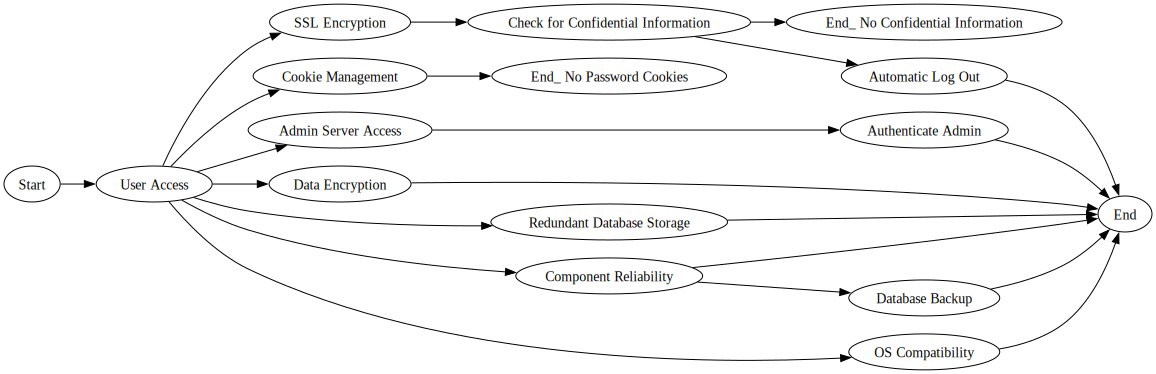

In [74]:
#change this so that it is a nested list of lists
annotation = [['Start', 'User Access'], 
              ['User Access', 'SSL Encryption'], 
              ['SSL Encryption', 'Check for Confidential Information'], 
              ['Check for Confidential Information', 'End: No Confidential Information'], 
              ['Check for Confidential Information', 'Automatic Log Out'], 
              ['Automatic Log Out', 'End'], 
              ['User Access', 'Cookie Management'], 
              ['Cookie Management', 'End: No Password Cookies'], 
              ['User Access', 'Admin Server Access'], 
              ['Admin Server Access', 'Authenticate Admin'], 
              ['Authenticate Admin', 'End'], 
              ['User Access', 'Data Encryption'], 
              ['Data Encryption', 'End'], 
              ['User Access', 'Redundant Database Storage'], 
              ['Redundant Database Storage', 'End'], 
              ['User Access', 'Component Reliability'], 
              ['Component Reliability', 'Database Backup'], 
              ['Database Backup', 'End'], 
              ['Component Reliability', 'End'], 
              ['User Access', 'OS Compatibility'], 
              ['OS Compatibility', 'End']]

temp_df = pd.DataFrame(annotation, columns=['from_node', 'to_node'])
temp_df['ProjectID'] = id_
annotation_df = pd.concat((annotation_df, temp_df), axis = 0)

render_graph(annotation)

In [75]:
id_ = applicable_projects[3]
sample = df_grouped.loc[df_grouped['ProjectID'] == id_]
sample

,ProjectID,RequirementText
1,19,The system must be easy to use by both managers and chefs such that they do not need to read an extensive amount of manuals. The system must be quickly accessible by both managers and chefs. The system must be intuitive and simple in the way it displays all relevant data and relationships. The menus of the system must be easily navigable by the users with buttons that are easy to understand. All the functions of the system must be available to the user every time the system is turned on. The calculations performed by the system must comply according to the norms set by the user and should not vary unless explicitly changed by the user. The client should agree to EULA before using our software.


In [76]:
qwe.loc[qwe['ProjectID'] == id_, 'Answer'].reset_index(drop=True)[0]

"['Start', 'Access System'] ['Access System', 'User Login'] ['User Login', 'Verify Credentials'] ['Verify Credentials', 'EULA Agreement'] ['EULA Agreement', 'Successful Login and Redirection'] ['EULA Agreement', 'End: Access Denied'] ['Successful Login and Redirection', 'Exclusive Gateway: User role?'] ['Exclusive Gateway: User role?', 'Menu Navigation'] ['Exclusive Gateway: User role?', 'Access All Functions'] ['Menu Navigation', 'Navigate Menus'] ['Navigate Menus', 'End'] ['Access All Functions', 'Use All System Functions'] ['Use All System Functions', 'End']"

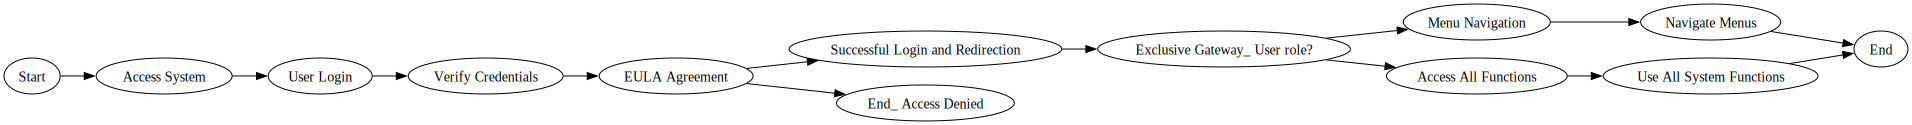

In [77]:
#change this so that it is a nested list of lists
annotation = [['Start', 'Access System'], 
              ['Access System', 'User Login'], 
              ['User Login', 'Verify Credentials'], 
              ['Verify Credentials', 'EULA Agreement'], 
              ['EULA Agreement', 'Successful Login and Redirection'], 
              ['EULA Agreement', 'End: Access Denied'], 
              ['Successful Login and Redirection', 'Exclusive Gateway: User role?'], 
              ['Exclusive Gateway: User role?', 'Menu Navigation'], 
              ['Exclusive Gateway: User role?', 'Access All Functions'], 
              ['Menu Navigation', 'Navigate Menus'], 
              ['Navigate Menus', 'End'], 
              ['Access All Functions', 'Use All System Functions'], 
              ['Use All System Functions', 'End']]

temp_df = pd.DataFrame(annotation, columns=['from_node', 'to_node'])
temp_df['ProjectID'] = id_
annotation_df = pd.concat((annotation_df, temp_df), axis = 0)

render_graph(annotation)